In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score
import pickle


In [2]:
# Define the path to your CSV file
file_path = 'train_combined.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

In [3]:
# from utils import preprocess_dataframe

# df = preprocess_dataframe(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,gold truth
0,/login,401,/login,401,/login,401,/login,401,/login,401,...,401,/login,401,/login,401,/forget_password,200,/login,401,0
1,/login,200,/login,200,/login,401,/login,200,/login,200,...,200,/login,401,/login,200,/login,200,/login,200,1
2,/login,401,/login,401,/login,401,/login,401,/login,401,...,401,/login,401,/login,401,/login,401,/login,401,0
3,/login,200,/login,200,/login,200,/login,200,/login,200,...,200,/login,200,/login,200,/login,401,/login,200,1
4,/login,401,/login,401,/login,401,/login,401,/login,401,...,401,/login,401,/login,401,/login,401,/login,401,0


In [4]:
from utils import create_dummies
train_x = df.drop(['gold truth'], axis=1)
train_x = create_dummies(train_x)

train_x.head()

c:\Github\FYP-Cyberguard\Evaluation\utils.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[new_col_name_forget_password] = column_data != "/login"
c:\Github\FYP-Cyberguard\Evaluation\utils.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[new_col_name_login] = column_data == "/login"
c:\Github\FYP-Cyberguard\Evaluation\utils.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

,0_/forget_password,0_/login,1_200,1_401,2_/forget_password,2_/login,3_200,3_401,4_/forget_password,4_/login,...,55_200,55_401,56_/forget_password,56_/login,57_200,57_401,58_/forget_password,58_/login,59_200,59_401
0,False,True,True,False,False,True,True,False,False,True,...,True,False,True,False,False,False,False,True,True,False
1,False,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,False,True,True,False,False,True,True,False,False,True,...,True,False,False,True,True,False,False,True,True,False
3,False,True,False,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,True,False,False,True,...,True,False,False,True,True,False,False,True,True,False


In [5]:
train_data, val_data = train_test_split(train_x, test_size=0.2, random_state=12)
val_data1, val_data2 = train_test_split(val_data, test_size=0.5, random_state=12)

# Training Autoencoder

In [6]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
     

In [ ]:
# Define the input shape
input_shape = (train_data.shape[1],)  # Number of features (columns)

# Define the autoencoder architecture
input_layer = Input(shape=input_shape)
encoded1 = Dense(32, activation='relu')(input_layer)  # Adjust the number of neurons in the hidden layer as needed
encoded2 = Dense(16, activation='relu')(encoded1)
encoded3 = Dense(8, activation='relu')(encoded2)
decoded3 = Dense(16, activation='relu')(encoded3)
decoded2 = Dense(32, activation='relu')(encoded3)
decoded1 = Dense(input_shape[0], activation='sigmoid')(decoded2)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded1)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the autoencoder
autoencoder.fit(train_data, train_data, epochs=100, batch_size=64, shuffle=True, validation_data=(val_data1, val_data1))



Epoch 1/100
125/125 [==============================] - 1s 6ms/step - loss: 0.1137 - mse: 0.1137 - val_loss: 0.0764 - val_mse: 0.0764
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 3/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 6/100
125/125 [==============================] - 1s 5ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 0.0551 - mse: 0.0551 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 8/100
125/125 [==============================] - 1s 4ms/step - 

In [ ]:
autoencoder.save("saved_model", save_format='tf')
# print(f"Model successfully saved to {save_path}")

INFO:tensorflow:Assets written to: saved_model\assets


: 

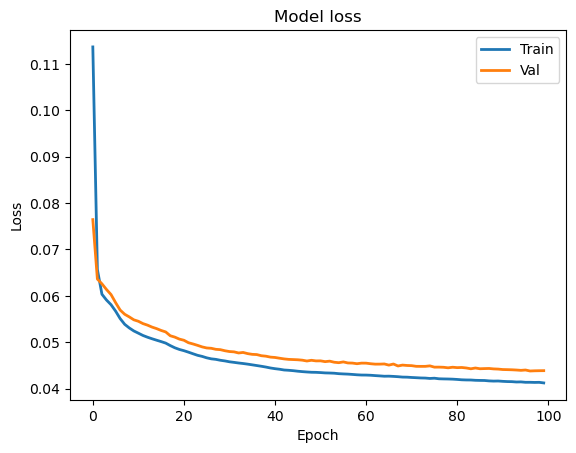

In [10]:
import matplotlib.pyplot as plt
plt.plot(autoencoder.history.history['loss'], linewidth=2, label='Train')
plt.plot(autoencoder.history.history['val_loss'], linewidth=2, label='Val')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [11]:
reconstructed_data = autoencoder.predict(val_data2)
mse = np.mean(np.power(val_data2 - reconstructed_data, 2), axis=1)


32/32 [==============================] - 0s 2ms/step


# Evaluation

In [12]:
file_path = 'test_combined.csv'
test = pd.read_csv(file_path)

In [13]:
test_x = df.drop(['gold truth'], axis=1)
test_x = create_dummies(test_x)
test_y = df['gold truth']

c:\Github\FYP-Cyberguard\Evaluation\utils.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[new_col_name_forget_password] = column_data != "/login"
c:\Github\FYP-Cyberguard\Evaluation\utils.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[new_col_name_login] = column_data == "/login"
c:\Github\FYP-Cyberguard\Evaluation\utils.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [14]:
reconstructed_data = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - reconstructed_data, 2), axis=1)
reconstructed_data

311/311 [==============================] - 1s 2ms/step


array([[2.4317399e-02, 9.7443962e-01, 9.9583149e-01, ..., 1.0000000e+00,
        1.0000000e+00, 4.9593663e-12],
       [1.3791674e-01, 8.7038237e-01, 3.7646657e-01, ..., 1.0000000e+00,
        5.6921995e-01, 7.9525232e-13],
       [4.8708757e-03, 9.9276024e-01, 9.9693608e-01, ..., 1.0000000e+00,
        1.0000000e+00, 3.0265445e-12],
       ...,
       [3.3396256e-01, 7.2751999e-01, 3.7098145e-01, ..., 1.0885060e-02,
        2.0263892e-01, 2.7192765e-04],
       [2.6852027e-01, 7.2201198e-01, 3.6271426e-01, ..., 9.6188748e-01,
        3.8379845e-01, 4.2745381e-09],
       [2.4850455e-01, 7.3956531e-01, 4.1246367e-01, ..., 1.0000000e+00,
        5.5051368e-01, 2.6121156e-09]], dtype=float32)

Optimal threshold for maximum recall with precision >= 0.95: 0.024388734251260757
Precision at this threshold: 0.9502963104568916
Recall at this threshold: 1.0


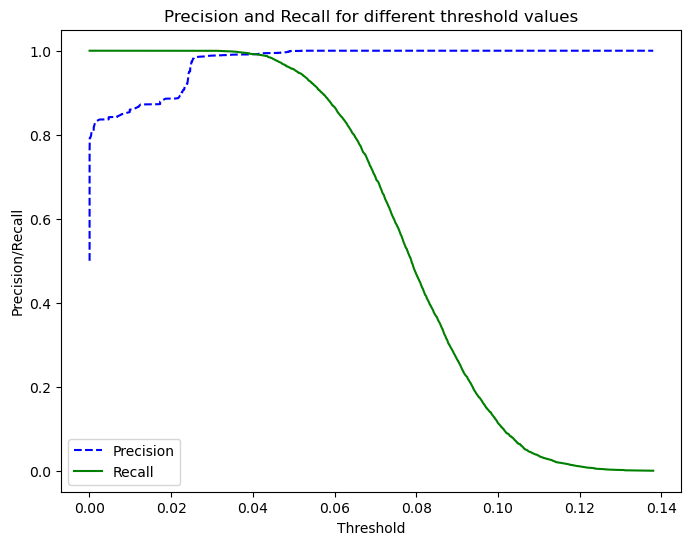

              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97      4971
      Attack       0.95      1.00      0.97      4971

    accuracy                           0.97      9942
   macro avg       0.98      0.97      0.97      9942
weighted avg       0.98      0.97      0.97      9942

ROC AUC Score: 0.9997626547797382


In [15]:
#new
precision, recall, thresholds = precision_recall_curve(test_y, mse)
min_precision = 0.95  # Adjust this value as needed
indices = np.where(precision[:-1] >= min_precision)[0]

if len(indices) > 0:
    # Among these, find the threshold with the maximum recall
    recalls_at_indices = recall[indices]
    max_recall_index = indices[np.argmax(recalls_at_indices)]
    optimal_threshold = thresholds[max_recall_index]
    print(f"Optimal threshold for maximum recall with precision >= {min_precision}: {optimal_threshold}")
    print(f"Precision at this threshold: {precision[max_recall_index]}")
    print(f"Recall at this threshold: {recall[max_recall_index]}")
else:
    # If no threshold meets the minimum precision requirement, use the threshold with maximum recall
    optimal_threshold = thresholds[0]
    print("No threshold found with precision above the minimum acceptable level.")
    print(f"Using threshold that gives maximum recall: {optimal_threshold}")
    print(f"Precision at this threshold: {precision[0]}")
    print(f"Recall at this threshold: {recall[0]}")

# Plotting Precision-Recall vs Threshold
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall for different threshold values')
plt.legend(loc='best')
plt.show()
# Now, make predictions using the optimal threshold
predictions = (mse > optimal_threshold).astype(int)

# Evaluate the classification
print(classification_report(test_y, predictions, target_names=['Normal', 'Attack']))
print("ROC AUC Score:", roc_auc_score(test_y, mse))